### Decision Tree Titanic dataset.

Objectives : Create a decision tree that can predict the survival of passengers on the Titanic. Make sure not to impose any restrictions on the depth of the tree.

In [211]:
# importing libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# reading dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*fGXgq2wZ8GBmmvn2aHMnnA.png" alt="Image" style="width: 700px;">

In [212]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The 'Embarked' column contains two missing values, two of 891 rows will not affect the whole picture of the dataset, so we can drop missing values.  In the 'Cabin' column missing 687 items, we don't know why for sure and this feature can't help us with modelling target 'Survived'. The "PassengerID" shows us an index of the item that does not relate to the target and "Ticket" contains a ticket code that is not helpful, let's remove these two columns. 

In [213]:
titanic_df = titanic_df.dropna(subset=['Embarked'])

In [214]:
# You can also drop whichever other columns you'd like here
titanic_df.drop(["Cabin", "Ticket", "PassengerId"], axis=1, inplace=True)

In the "Age" column 177 missing values. The values Missing Completely At Random(MCAR). One of the ways to fill them is using mean and std.

In [215]:
# The column 'Age' have some missing values, we need to replace them with aggregation of mean and std of available values. 

age_avg = titanic_df['Age'].mean()
age_std = titanic_df['Age'].std()
age_null_count = titanic_df['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
titanic_df.loc[np.isnan(titanic_df['Age']), 'Age'] = age_null_random_list
titanic_df['Age'] = titanic_df['Age'].astype(int)

In [216]:
titanic_df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex  Age  SibSp  Parch     Fare Embarked  
0    male   22      1      0   7.2500        S  
1  female   38      1      0  71.2833        C  
2  female   26      0      0   7.9250        S  
3  female   35      1      0  53.1000        S  
4    male   35      0      0   8.0500        S

To transform our categorical variables we need to use encoding techniques. Before starting encoding, we need to identify if these variables are Ordinal or Nominal to know for sure which technique to implement, 'Labeling' when variables are Ordinal and 'One Hot Encoding' if variables are Nominal.

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [217]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [218]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], dtype=int)
titanic_df.head()

Survived  Pclass                                               Name  Age  \
0         0       3                            Braund, Mr. Owen Harris   22   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38   
2         1       3                             Heikkinen, Miss. Laina   26   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   35   
4         0       3                           Allen, Mr. William Henry   35   

   SibSp  Parch     Fare Embarked  Sex_female  Sex_male  
0      1      0   7.2500        S           0         1  
1      1      0  71.2833        C           1         0  
2      0      0   7.9250        S           1         0  
3      1      0  53.1000        S           1         0  
4      0      0   8.0500        S           0         1

Now, we do the same to the "Embarked" column.

In [219]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"], dtype=int)
titanic_df.head()

Survived  Pclass                                               Name  Age  \
0         0       3                            Braund, Mr. Owen Harris   22   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38   
2         1       3                             Heikkinen, Miss. Laina   26   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   35   
4         0       3                           Allen, Mr. William Henry   35   

   SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0      1      0   7.2500           0         1           0           0   
1      1      0  71.2833           1         0           1           0   
2      0      0   7.9250           1         0           0           0   
3      1      0  53.1000           1         0           0           0   
4      0      0   8.0500           0         1           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

We can use "Name" column to extract titles from them and use them in modelling.

In [220]:
# Extracting titles from column 'Name' and encoding.

def get_title(name):
 title_search = re.search(' ([A-Za-z]+)\.', name)
 if title_search:
  return title_search.group(1)
 return ""

titanic_df['Title'] = titanic_df['Name'].apply(get_title)
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [221]:
# Clean the variable Title.

titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
  'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'noble')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Mrs')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'noble'], dtype=object)

In [222]:
# Encoding column "Title" and delete "Name" column.

titanic_df = pd.get_dummies(titanic_df, prefix="Title", columns=["Title"], dtype=int)
titanic_df.head()

titanic_df.drop(["Name"], axis=1, inplace=True)

In [223]:
# Mapping Fare

titanic_df.loc[ titanic_df['Fare'] <= 7.91, 'Fare'] 						        = 0
titanic_df.loc[(titanic_df['Fare'] > 7.91) & (titanic_df['Fare'] <= 14.454), 'Fare'] = 1
titanic_df.loc[(titanic_df['Fare'] > 14.454) & (titanic_df['Fare'] <= 31), 'Fare']   = 2
titanic_df.loc[ titanic_df['Fare'] > 31, 'Fare'] 							        = 3
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

In [224]:
# Mapping Age

titanic_df.loc[ titanic_df['Age'] <= 16, 'Age'] 					       = 0
titanic_df.loc[(titanic_df['Age'] > 16) & (titanic_df['Age'] <= 32), 'Age'] = 1
titanic_df.loc[(titanic_df['Age'] > 32) & (titanic_df['Age'] <= 48), 'Age'] = 2
titanic_df.loc[(titanic_df['Age'] > 48) & (titanic_df['Age'] <= 64), 'Age'] = 3
titanic_df.loc[ titanic_df['Age'] > 64, 'Age']
titanic_df['Age'] = titanic_df['Age'].astype(int)

All our columns are numeric, we need to see the correlation between features to identify which ones we leave for modelling and which ones we drop.

<Axes: >

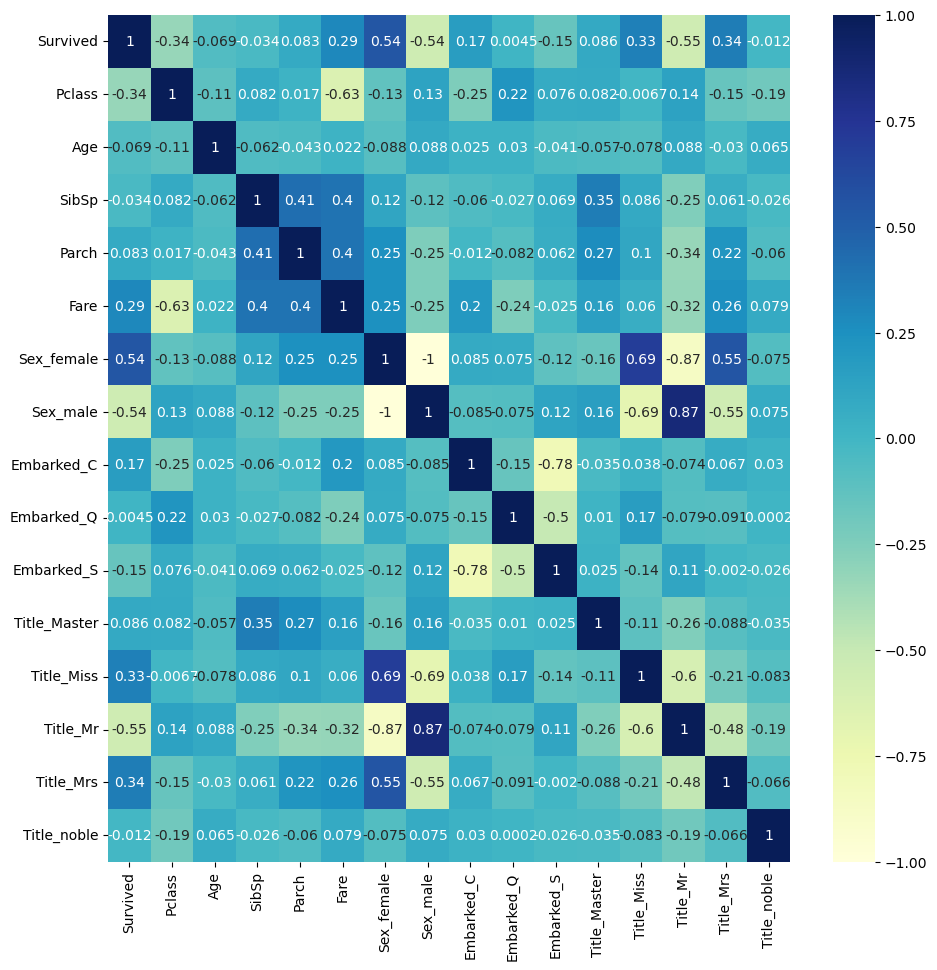

In [225]:
plt.figure(figsize=(11, 11))
sns.heatmap(titanic_df.corr(), annot=True, cmap='YlGnBu')

Text(0.5, 1.0, 'Correlation with target variable')

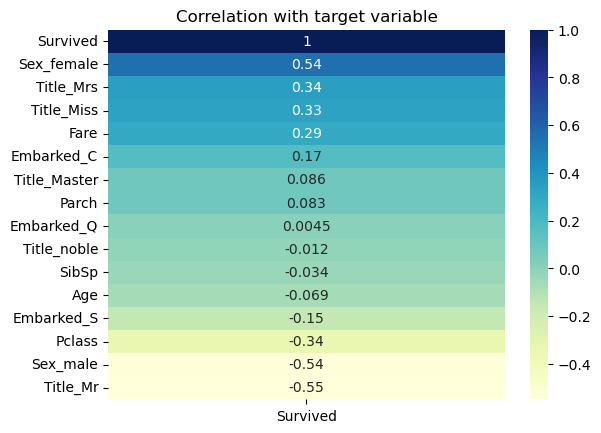

In [226]:
corr = titanic_df.corr()[['Survived']].sort_values(by='Survived', ascending=False)
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation with target variable')

The features 'Title_Miss' vs 'Sex_female' and 'Title_Mrs' vs 'Sex_female' have a strong positive correlation that is not a surprise. These features show us the same information. The strong correlation between features can have a bad influence on our model, so we need to leave only 'Sex_female' with the best correlation with "Survived".

In [227]:
# Dropping columns with strong negative correlation.
titanic_df.drop(["Sex_male", "Title_Mr", "Title_Miss", "Title_Mrs"], axis=1, inplace=True)

In [228]:
# Splitting dataset for features and target

X = titanic_df.drop(["Survived"], axis=1)
y = titanic_df.iloc[:, 0]

We need to split the data into a training, development and test set. This technique helps us improve our model. We are going to use the development part to identify max_depth and the test part to evaluate our model. If we use one test part in both steps the model output will be inaccurate. 

In [229]:
# Split the original dataset into training and test sets
r = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=r)

# Split the training set further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train,
y_train, test_size=0.2, random_state=r)

In [230]:
# Inspecting the Dataset:
print ("Training data:",X_train.shape, y_train.shape)
print ("Developing data:",X_dev.shape, y_dev.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (568, 11) (568,)
Developing data: (143, 11) (143,)
Test data: (178, 11) (178,)


In [231]:
# training a model without pruning

unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)

print("At depth:", unpruned.tree_.max_depth)

y_train_pred = unpruned.predict(X_train)
y_dev_pred = unpruned.predict(X_dev)

print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_dev, y_dev_pred)}')

At depth: 12
Training Accuracy: 0.9084507042253521
Testing Accuracy: 0.8321678321678322


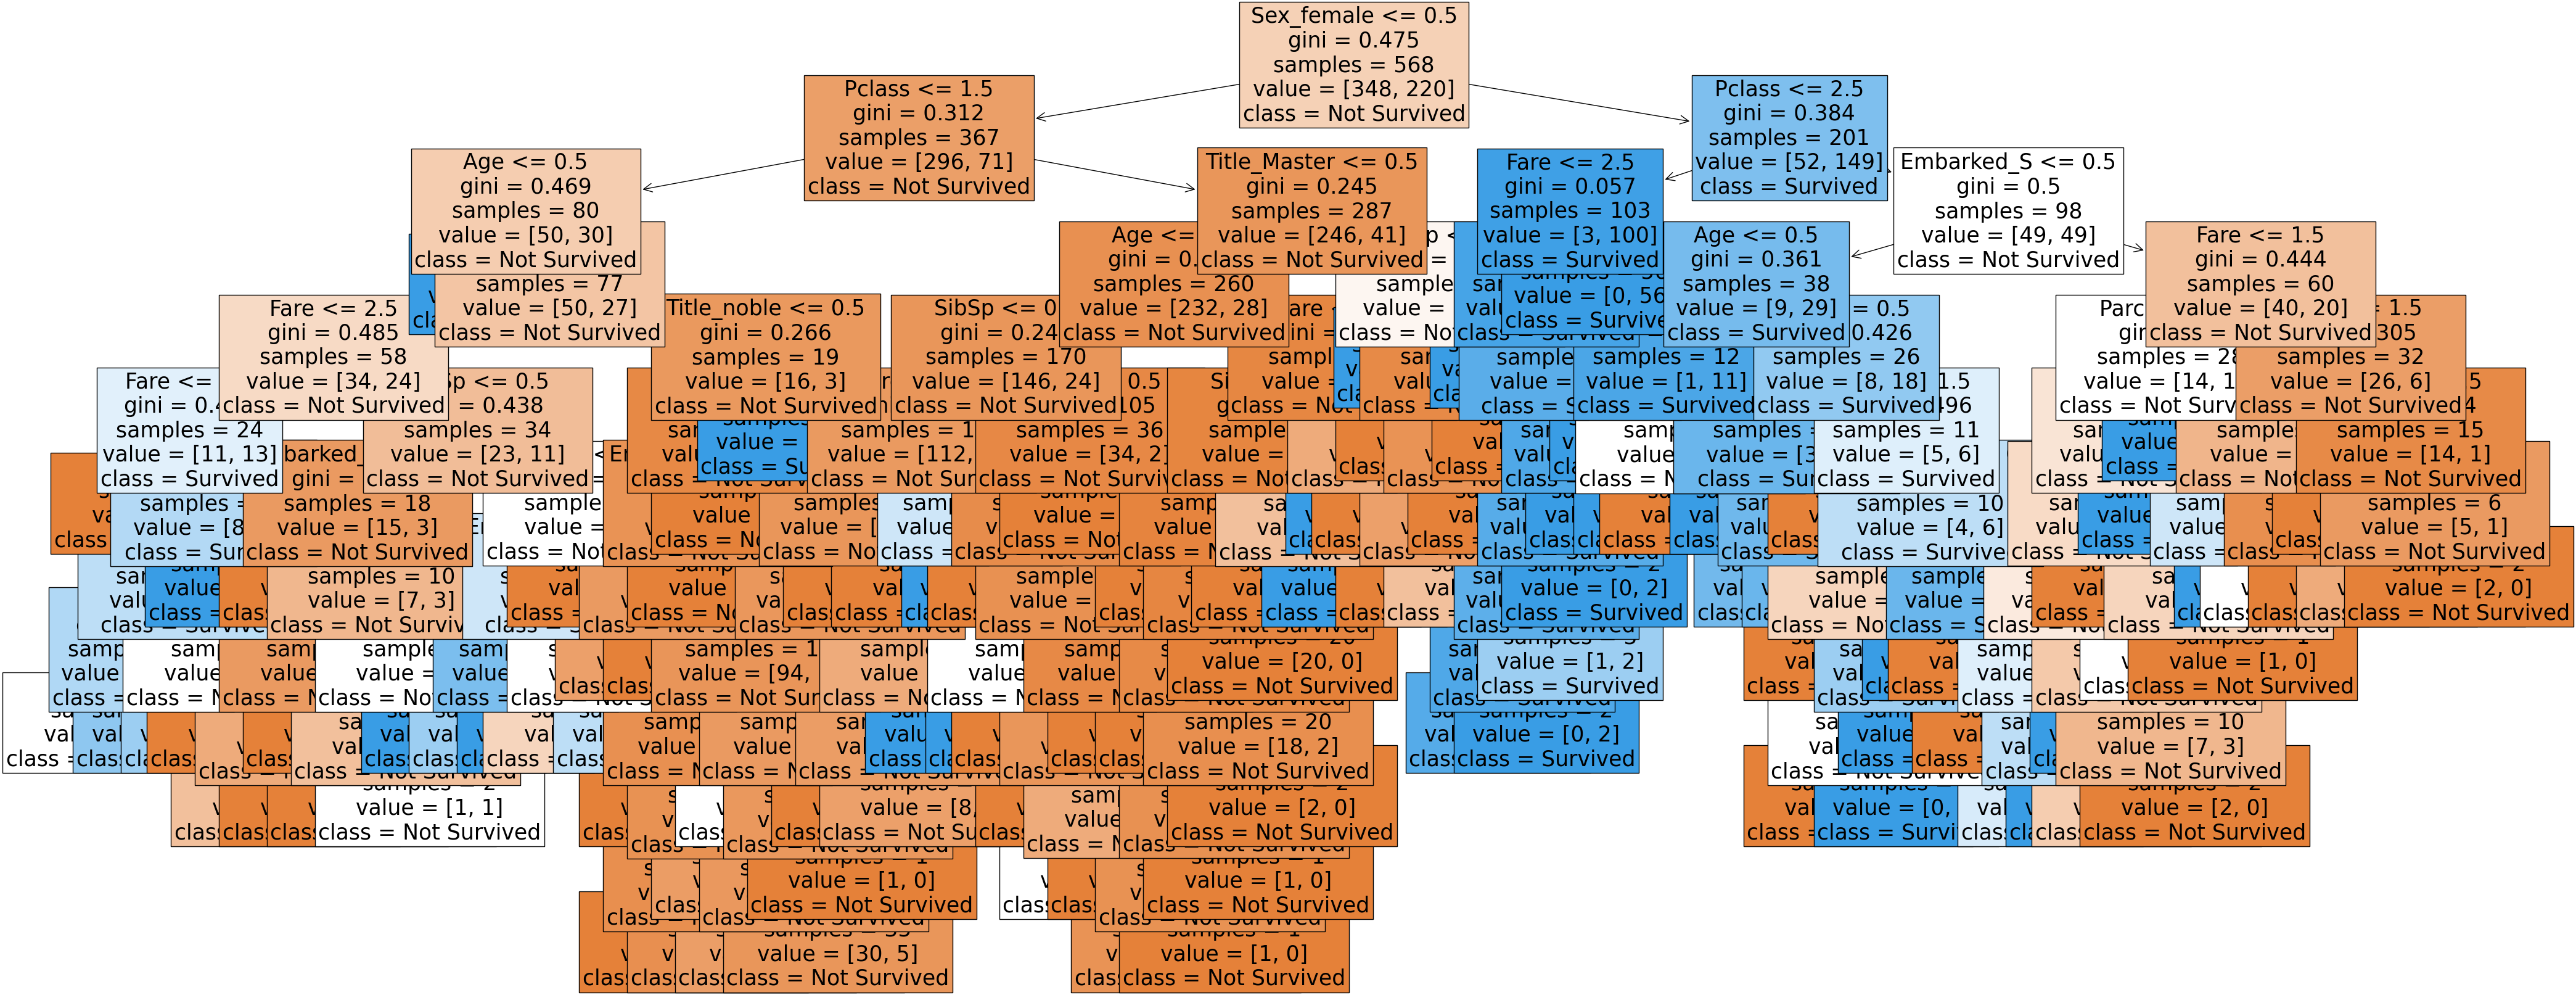

In [232]:
plt.figure(figsize=(50,20))
features = X_train.columns
classes = ['Not Survived','Survived']
tree.plot_tree(unpruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

To find the best max_depth for this dataset and model we need to see accuracies for each model with depth from 2 to maximum and plot them.

Text(0.5, 1.0, 'Accuracy vs Max_depth for training and testing sets')

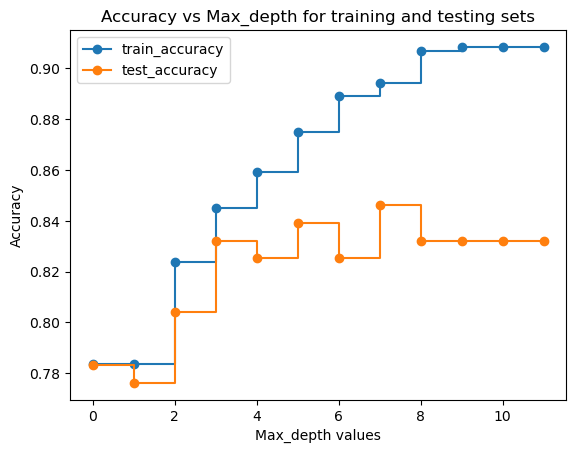

In [233]:
# looking at effect of max_depth pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

train_acc = []
test_acc = []
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  y_train_pred = clf.predict(X_train)
  y_dev_pred = clf.predict(X_dev)
  train_acc.append(accuracy_score(y_train_pred, y_train))
  test_acc.append(accuracy_score(y_dev_pred,y_dev))

plt.plot(train_acc,label='train_accuracy',marker='o',drawstyle="steps-post")
plt.plot(test_acc,label='test_accuracy',marker='o',drawstyle="steps-post")
plt.legend()
plt.xlabel("Max_depth values")
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max_depth for training and testing sets')

The training accuracies line continues to rise, it suggests overfitting. The development accuracies line initially increases and then stabilizes, it suggests that the model is learning general patterns from the training data but may not generalize well to unseen data.

In [234]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(test_acc)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth,random_state=r)

# Train Decision Tree Classifer
pruned.fit(X_train, y_train)

y_train_pred = pruned.predict(X_train)
y_test_pred = pruned.predict(X_test)

print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred)}')

Best performance reached at depth of: 8
Training Accuracy: 0.8943661971830986
Testing Accuracy: 0.7921348314606742


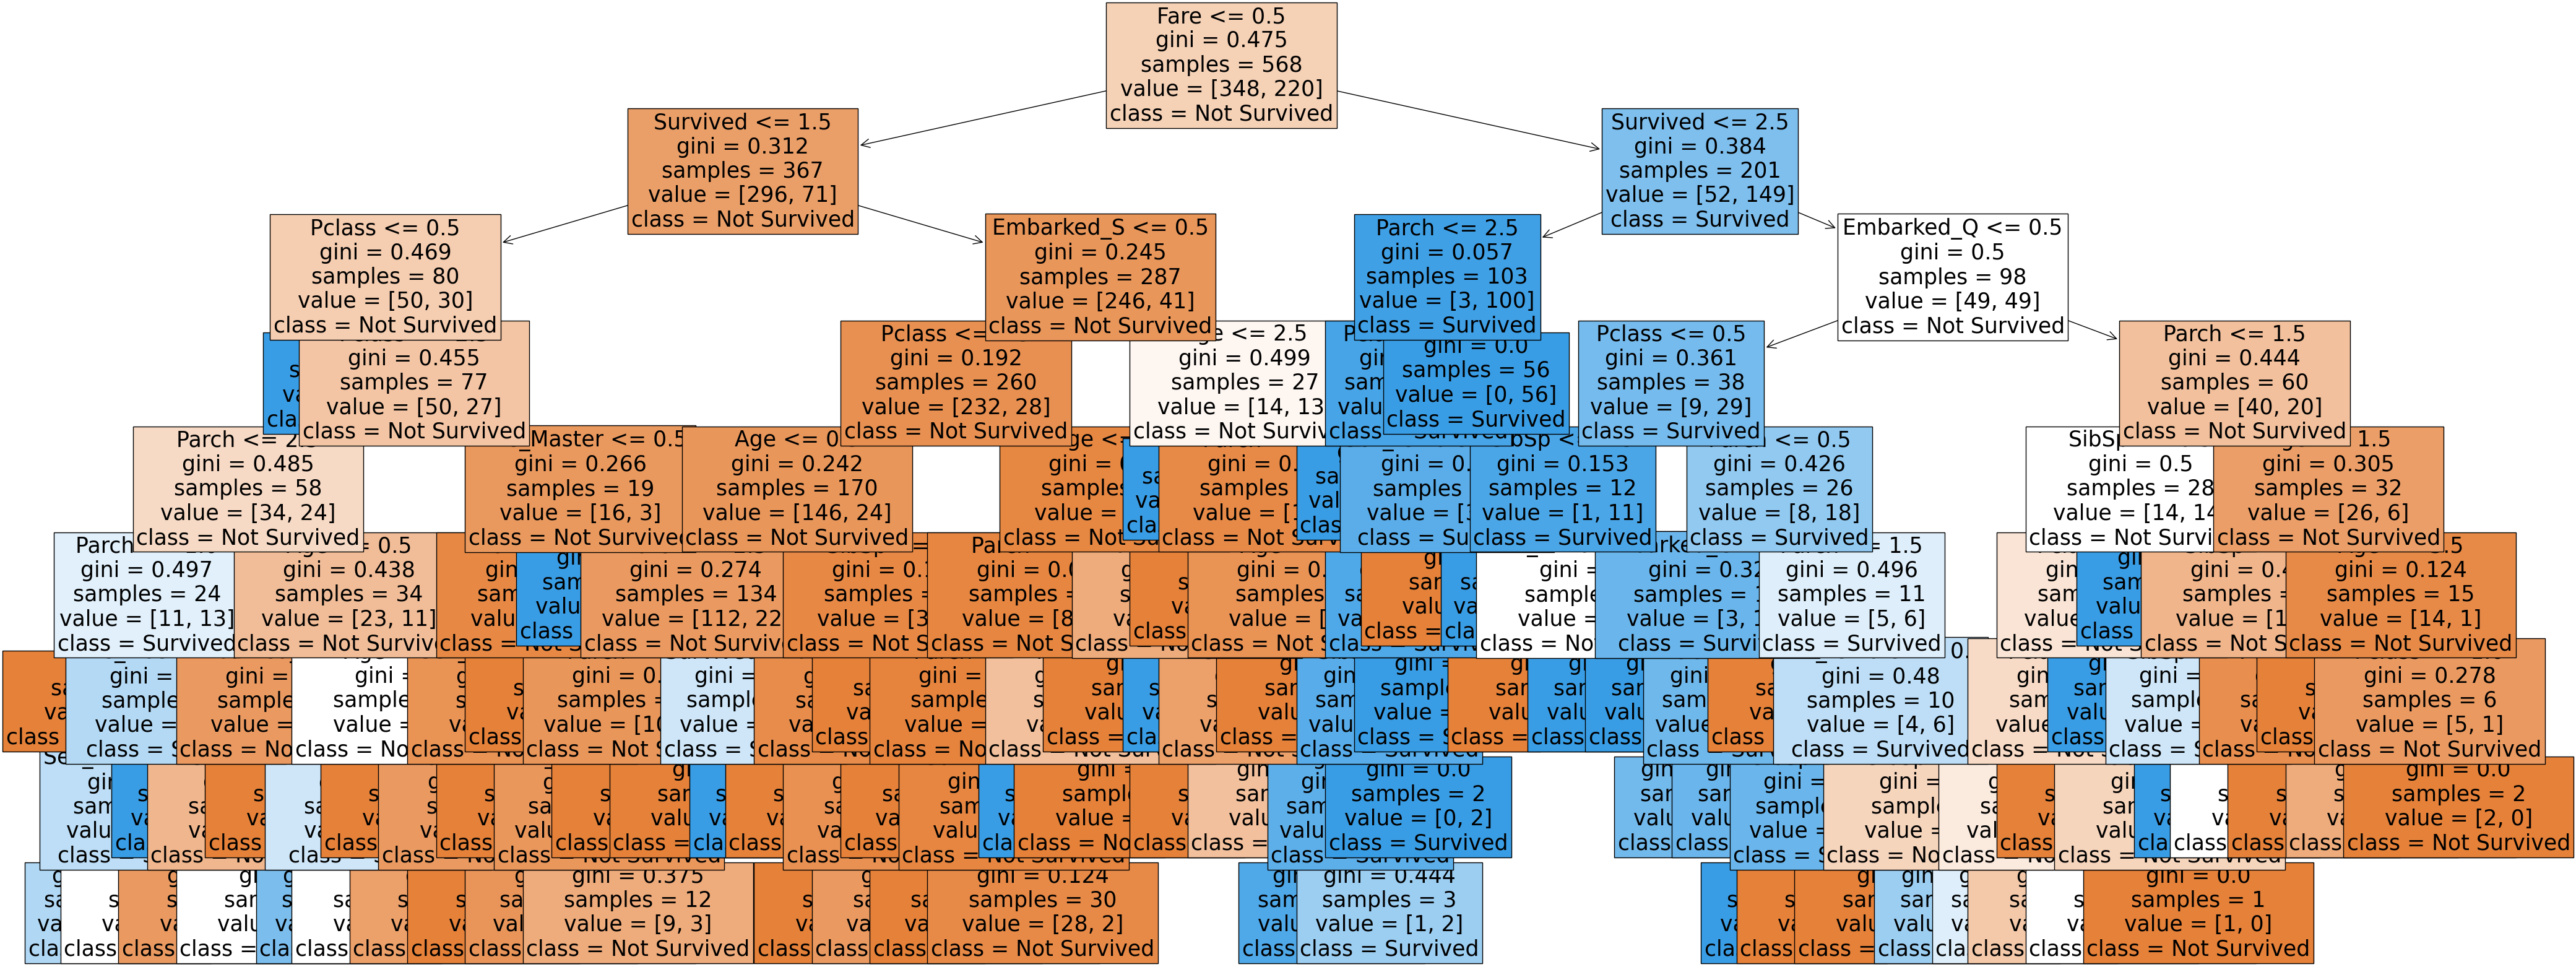

In [235]:
plt.figure(figsize=(50,20))
features = titanic_df.columns
classes = ['Not Survived','Survived']
tree.plot_tree(pruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

### Part 2 Random Forest

● Create a bagged, random forest, and boosted tree for the Titanic data set in the same way that you created a regular classification tree.

In [236]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

# Create and train bagged classifier
bagged_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagged_classifier.fit(X_train, y_train)

# Create and train random forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Create and train boosted tree classifier
boosted_tree_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosted_tree_classifier.fit(X_train, y_train)

# Evaluate models
bagged_accuracy = accuracy_score(y_dev, bagged_classifier.predict(X_dev))
random_forest_accuracy = accuracy_score(y_dev, random_forest_classifier.predict(X_dev))
boosted_tree_accuracy = accuracy_score(y_dev, boosted_tree_classifier.predict(X_dev))

print("Bagged Classifier Accuracy:", bagged_accuracy)
print("Random Forest Classifier Accuracy:", random_forest_accuracy)
print("Boosted Tree Classifier Accuracy:", boosted_tree_accuracy)


Bagged Classifier Accuracy: 0.8321678321678322
Random Forest Classifier Accuracy: 0.8251748251748252
Boosted Tree Classifier Accuracy: 0.8251748251748252


It appears that the Bagged Classifier has achieved the highest accuracy among the three ensemble learning techniques, with an accuracy of approximately 83.22%. Both the Random Forest Classifier and the Boosted Tree Classifier have slightly lower accuracies, around 82.52%.

● From the random forest model, determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.

In [237]:
#Finding the important features using the built-in Gini importance
importances = random_forest_classifier.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

Feature  Gini Importance
5     Sex_female         0.356791
0         Pclass         0.151812
4           Fare         0.117342
1            Age         0.116765
2          SibSp         0.087170
3          Parch         0.066757
9   Title_Master         0.027343
8     Embarked_S         0.026269
6     Embarked_C         0.024464
7     Embarked_Q         0.016008
10   Title_noble         0.009280

Text(0, 0.5, 'Features')

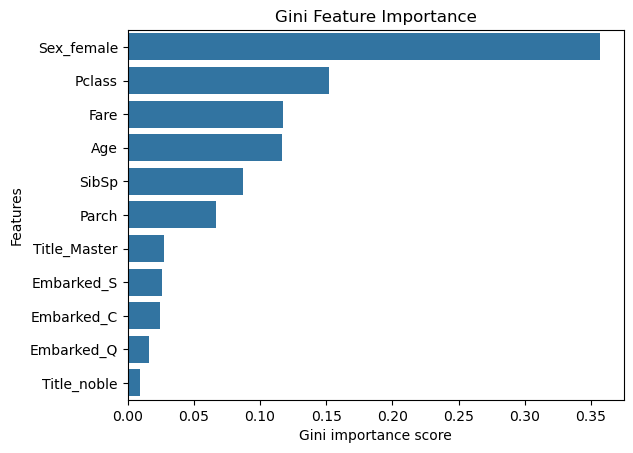

In [238]:
# Creating a seaborn bar plot
sns.barplot(x=feature_imp_df['Gini Importance'],y=feature_imp_df['Feature'],data=feature_imp_df)
plt.title("Gini Feature Importance")
plt.xlabel("Gini importance score")
plt.ylabel("Features")

The "Sex_female" feature indicates whether the passenger is female or not and has the highest importance score. It suggests that gender played a significant role in determining survival on the Titanic, with females likely having a higher chance of survival compared to males.

Passenger class, likely representing socioeconomic status, is the second most important feature. This underscores the well-documented fact that individuals in higher classes had better survival rates, possibly due to their proximity to lifeboats and other resources.

In [239]:
# Permutation feature importance
from sklearn.inspection import permutation_importance
result = permutation_importance(random_forest_classifier, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
perm_imp_df

Feature  Permutation Importance
5     Sex_female                0.182022
0         Pclass                0.045506
4           Fare                0.041573
1            Age                0.020787
2          SibSp                0.008427
9   Title_Master                0.006742
7     Embarked_Q                0.001124
10   Title_noble                0.000000
8     Embarked_S               -0.005618
6     Embarked_C               -0.010674
3          Parch               -0.013483

In [240]:
# drop the least important feature from X_train and X_dev
X_train = X_train.drop([ 'Parch', 'Embarked_S', 'Embarked_C'], axis=1)
X_dev = X_dev.drop([ 'Parch', 'Embarked_S', 'Embarked_C'], axis=1)
X_test = X_test.drop([ 'Parch', 'Embarked_S', 'Embarked_C'], axis=1)

# Create Random Forest Classifier

r = 42
rf = RandomForestClassifier(random_state=r)
rf.fit(X_train,y_train)

#Predict the response for test dataset for the models
y_test_pred = rf.predict(X_dev)

print(f'Testing Accuracy for Random Forest model: {random_forest_accuracy}')
print(f'Testing Accuracy for Random Forest model with Gini importance: {accuracy_score(y_dev, y_test_pred)}')

Testing Accuracy for Random Forest model: 0.8251748251748252
Testing Accuracy for Random Forest model with Gini importance: 0.8321678321678322


The number of parents/children aboard the Titanic has the lowest permutation importance among the features. Its negative importance score suggests that the model's performance improves when the values of this feature are randomly shuffled, indicating that it might not have significantly contributed to survival prediction in this analysis.

● Pick one of these methods, and tune the parameters n_estimators and max_depth.

In [241]:
# Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [242]:
#Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.8380281690140845


RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=25,
                       random_state=42)

In [243]:
best_depth=grid_search.best_params_['max_depth']
best_min_leaf=grid_search.best_params_['min_samples_leaf']
best_estimators=grid_search.best_params_['n_estimators']

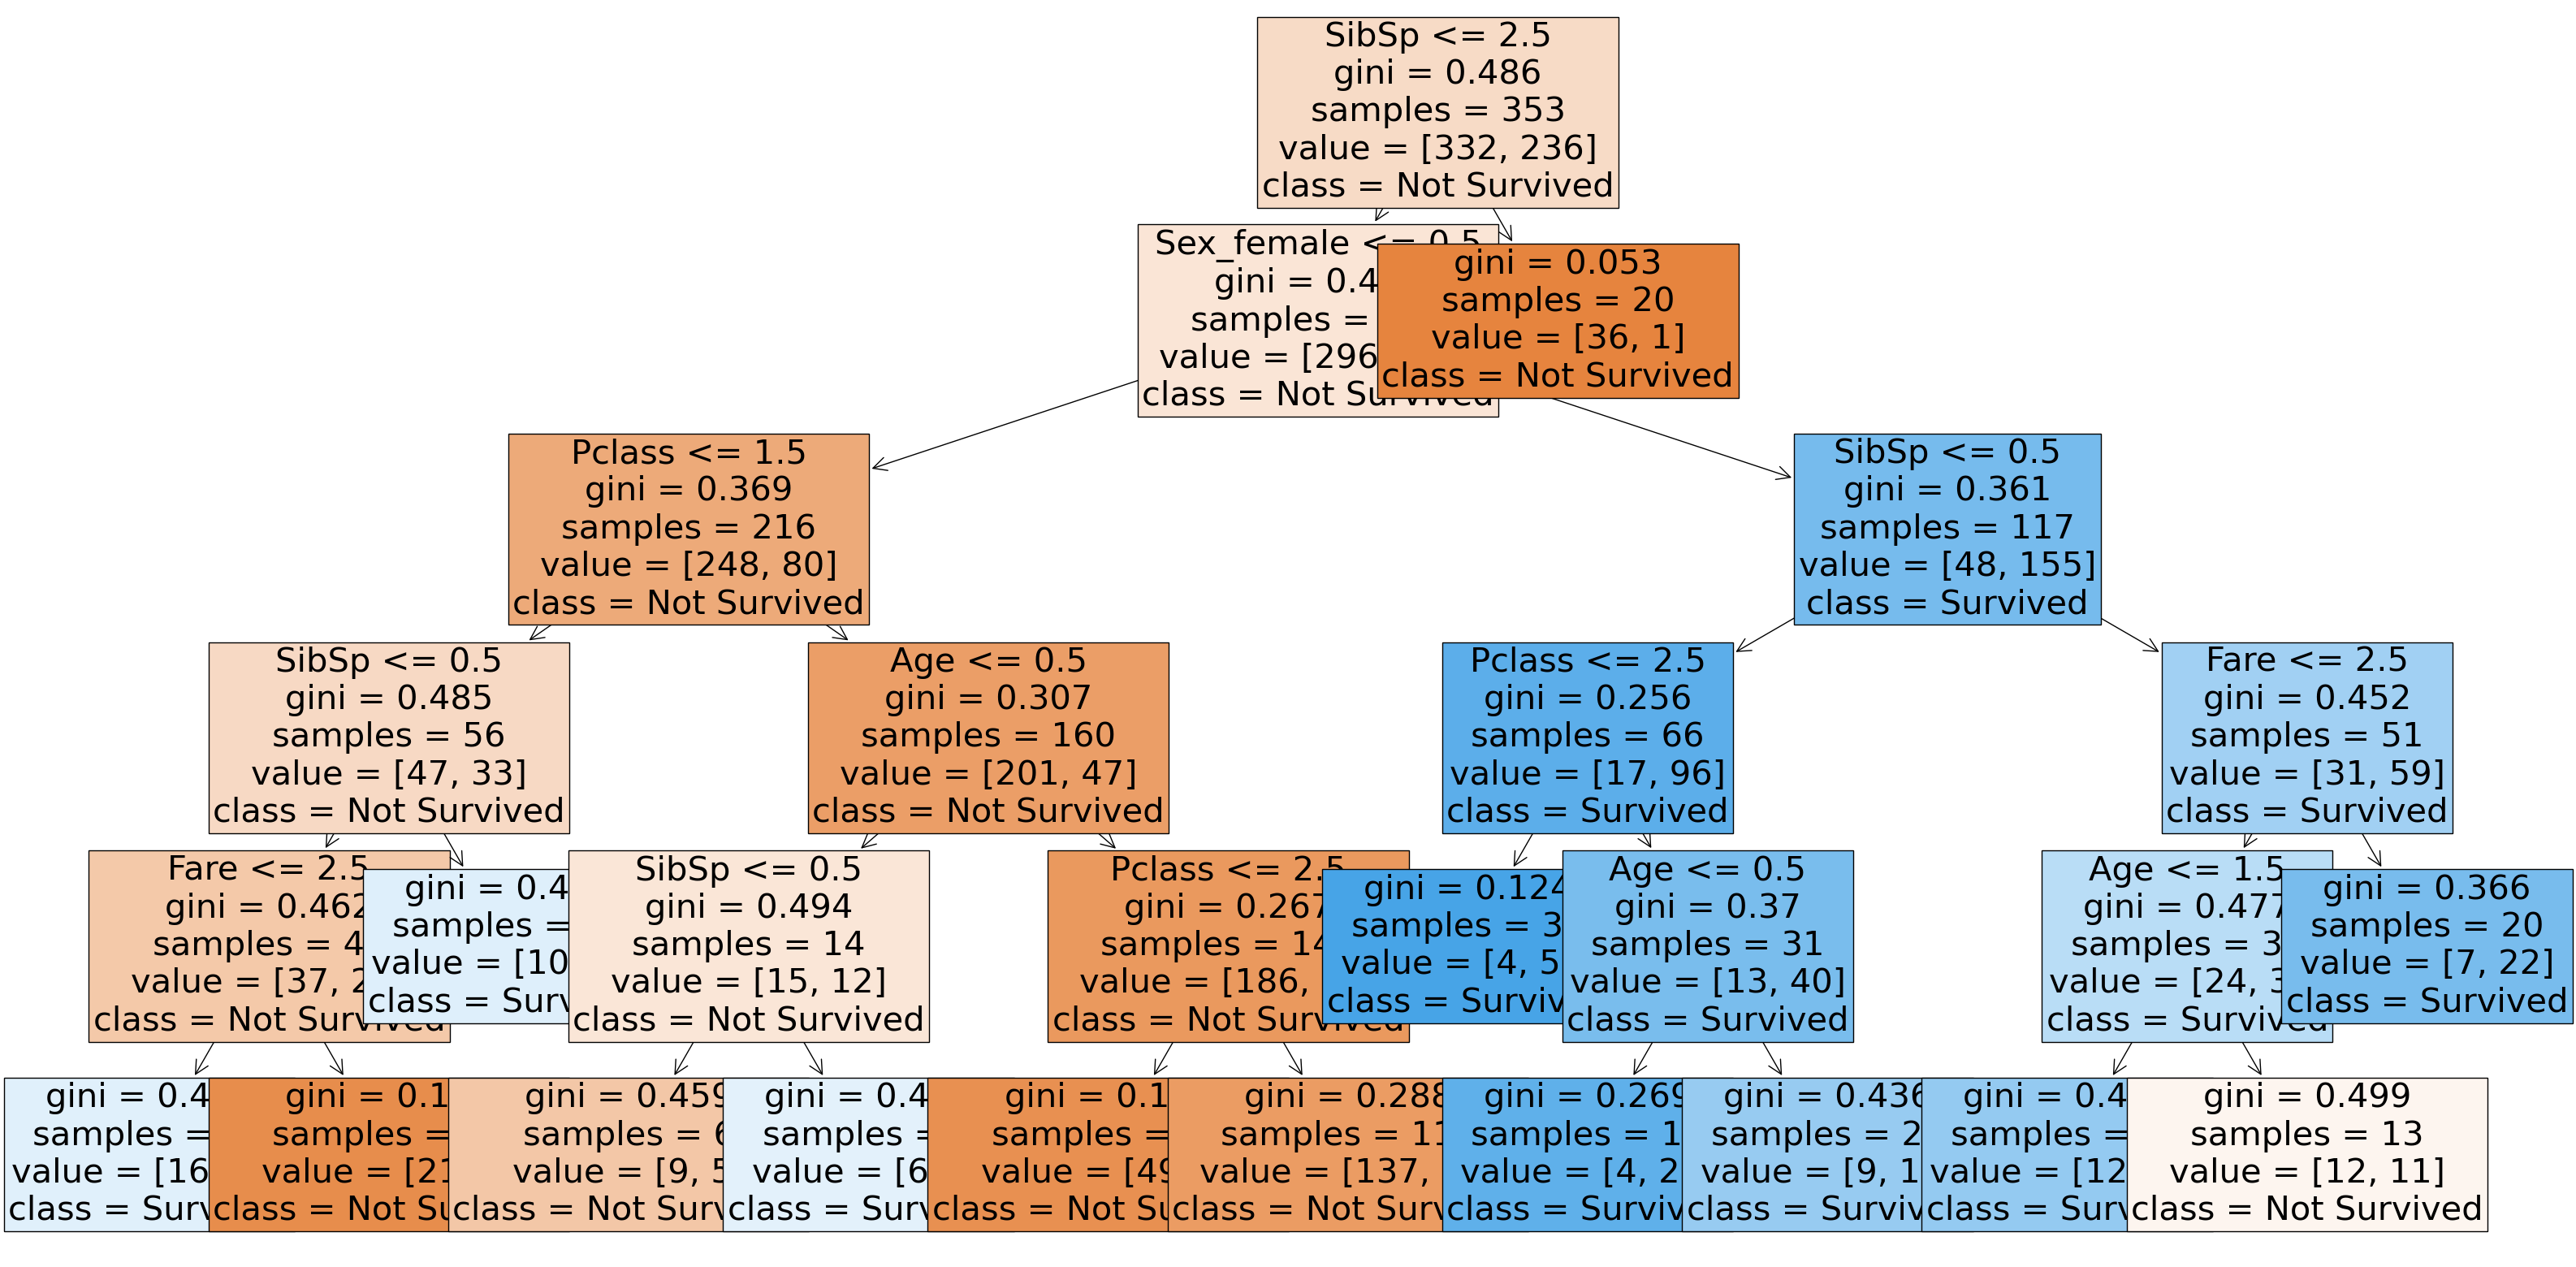

In [244]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(rf_best.estimators_[3], feature_names = X_train.columns,class_names=['Not Survived', 'Survived'],filled=True,fontsize=30)
plt.show()

Hyperparameter tuning using techniques like GridSearchCV helps find the optimal combination of hyperparameters for a machine learning model. Based on results, it appears that the best hyperparameters for Random Forest model are:

Best Depth: 5
Min Samples Leaf: 5
N Estimators: 25

By tuning these hyperparameters, I improved the performance of Random Forest model, achieving better accuracy.

● Report the accuracy of all models and report which model performed the best, including the values for n_estimators and max_depth that the best model had.

In [245]:
r = 42
base = DecisionTreeClassifier(max_depth=None,random_state=r)
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=r)
rf = RandomForestClassifier(random_state=r)
rf_hp = RandomForestClassifier(max_depth=best_depth, min_samples_leaf=best_min_leaf, n_estimators=best_estimators, random_state=r)

# Train the  classifiers
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
rf.fit(X_train,y_train)
rf_hp.fit(X_train,y_train)

#Predict the response for test dataset for the models
y_test_pred_base = base.predict(X_test)
y_test_pred_ensemble = ensemble.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_rf_hp = rf_hp.predict(X_test)

print(f'Testing Accuracy for base Decision Tree model: {accuracy_score(y_test, y_test_pred_base)}')
print(f'Testing Accuracy for ensemble Bagging model: {accuracy_score(y_test, y_test_pred_ensemble)}')
print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Random Forest model with hyperparameters: {accuracy_score(y_test, y_test_pred_rf_hp)}')

Testing Accuracy for base Decision Tree model: 0.7865168539325843
Testing Accuracy for ensemble Bagging model: 0.7865168539325843
Testing Accuracy for Random Forest model: 0.7808988764044944
Testing Accuracy for Random Forest model with hyperparameters: 0.8146067415730337


Here are some observations based on the results:

- The base Decision Tree model and the Bagging model have the same testing accuracy. Bagging typically helps to reduce overfitting and variance, but in this case, it seems that it didn't significantly improve performance.

- The Random Forest model, without hyperparameter tuning, performed slightly worse than the base Decision Tree model and the Bagging model.

- Hyperparameter tuning significantly improved the performance of the Random Forest model, resulting in the highest testing accuracy among all the models tested.

These results highlight the importance of hyperparameter tuning in optimizing model performance, especially for ensemble methods like Random Forests.